# Financial Risk Management System: Fraud Detection and Credit Risk Assessment for Financial Institutions

## Objective:
This project addresses the crucial real-world need for robust financial risk management by helping institutions detect fraud early and assess customers’ credit risk effectively. Through predictive analytics and comprehensive customer profiling, the system identifies potential fraudulent activities and evaluates the likelihood of credit default, enabling financial institutions to make informed, data-driven decisions. By combining fraud detection with credit risk assessment, this project enhances financial security, minimizes losses, and supports responsible lending practices.

## Contains
### 1. Fraud Detection Analysis:

* Data Preprocessing: Cleanses and enriches data with features like time-based activity patterns, location consistency, and transaction-to-income ratios.
* EDA: Identifies fraud patterns across amount distribution, hour of the day, and device usage.
* Modeling: Builds and tunes machine learning models (Logistic Regression, Random Forest, XGBoost) to accurately classify transactions as fraud or not.
* Evaluation: Uses recall, precision, and ROC-AUC to assess model performance.

### 2. Credit Risk Analysis:

* Data Preprocessing: Manages missing data, generates interaction features like income-to-debt ratio.
* EDA: Segments users by distribution of verification status.
* Modeling: Develops classifiers (Logistic Regression, XGBoost) to predict credit risk based on financial behavior and historical patterns.
* Evaluation: Uses recall, precision, and ROC-AUC to assess model performance..

### Importing relevent libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score , roc_auc_score,roc_curve,auc
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

## 1. Fraud Detection Analysis

## Data Preprocessing

In [49]:
# importing the data set
data = pd.read_csv("fraud_detection_dataset.csv")
df1= data.copy()

In [50]:
df1.sample(10)

,timestamp,user_id,amount,location,device_type,is_fraud,age,income,debt,credit_score
878936,07-10-2023 15:07,c511a9d4-1c8b-4f73-a5c6-66e6ccf00b9a,158.41,East Kennethfort,Tablet,0,51,144840.81,29708.34,539
601551,11-07-2023 11:53,b733acc6-5ff7-4073-9e17-d39da32de3f7,205.82,Martinport,Mobile,0,31,27507.63,10729.79,469
977090,29-05-2023 16:58,358e84a6-0607-4f80-9829-d65929ffef89,387.27,West Maryside,Tablet,0,66,89013.46,23494.82,789
213430,04-12-2023 02:58,998a22b7-1ed8-4f15-9019-e4c807787791,218.87,North Keith,Tablet,0,36,131809.73,4460.98,543
1019586,21-08-2023 15:02,e3a1a648-1ddf-4bc4-a8ba-64d21443eebb,2664.52,Aaronville,Desktop,1,24,121096.55,10264.87,504
658010,22-05-2023 03:53,b129bc81-9c82-438d-b32b-fd3abd1e007c,675.93,South Sydney,Tablet,0,58,38214.33,47615.39,814
337493,18-04-2023 00:06,7e803e32-134f-4155-8836-18db9630994e,523.60,South Emily,Tablet,0,44,83212.85,18603.35,629
535834,25-04-2023 06:43,e837d025-b695-44f6-ab17-53764c3040d7,447.91,Fisherhaven,Tablet,0,55,25556.60,18589.33,562
594314,26-04-2023 19:31,d0787773-a4e6-409c-ae82-debad4ed921f,295.04,Hansontown,Desktop,0,34,103047.10,37009.43,386
380305,07-05-2023 23:48,b5c60450-5ef0-4b73-b24a-7a87b86f31da,692.78,Connieside,Tablet,0,55,28076.52,39951.69,436


In [51]:
df1.shape

(1048575, 10)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   timestamp     1048575 non-null  object 
 1   user_id       1048575 non-null  object 
 2   amount        1048575 non-null  float64
 3   location      1048575 non-null  object 
 4   device_type   1048575 non-null  object 
 5   is_fraud      1048575 non-null  int64  
 6   age           1048575 non-null  int64  
 7   income        1048575 non-null  float64
 8   debt          1048575 non-null  float64
 9   credit_score  1048575 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 80.0+ MB


In [53]:
df1.describe()

,amount,is_fraud,age,income,debt,credit_score
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.196493e+02,4.632477e-02,4.401753e+01,8.501809e+04,2.498568e+04,5.747631e+02
std,6.424198e+02,2.101876e-01,1.529689e+01,3.755313e+04,1.443316e+04,1.591370e+02
min,1.000000e+01,0.000000e+00,1.800000e+01,2.000009e+04,8.000000e-02,3.000000e+02
25%,2.690500e+02,0.000000e+00,3.100000e+01,5.249128e+04,1.248374e+04,4.370000e+02
50%,5.285200e+02,0.000000e+00,4.400000e+01,8.504178e+04,2.497456e+04,5.750000e+02
75%,7.880500e+02,0.000000e+00,5.700000e+01,1.175834e+05,3.746977e+04,7.130000e+02
max,4.999800e+03,1.000000e+00,7.000000e+01,1.500000e+05,4.999993e+04,8.500000e+02


In [54]:
#checking is there any null value
df1.isnull().sum()

,0
timestamp,0
user_id,0
amount,0
location,0
device_type,0
is_fraud,0
age,0
income,0
debt,0
credit_score,0


### Handling Outliers

<Axes: ylabel='amount'>

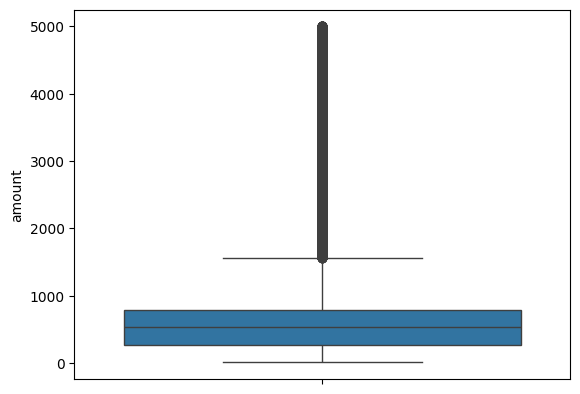

In [55]:
#checking outliers through visualizations
sns.boxplot(data=df1['amount'])

In [56]:
#removing outliers
Q1 = df1['amount'].quantile(0.25)
Q3 = df1['amount'].quantile(0.75)
IQR = Q3-Q1

df1 =  df1[(df1['amount'] >= Q1 - 1.5 * IQR ) & (df1['amount'] <= Q3 + 1.5 * IQR )]

<Axes: ylabel='amount'>

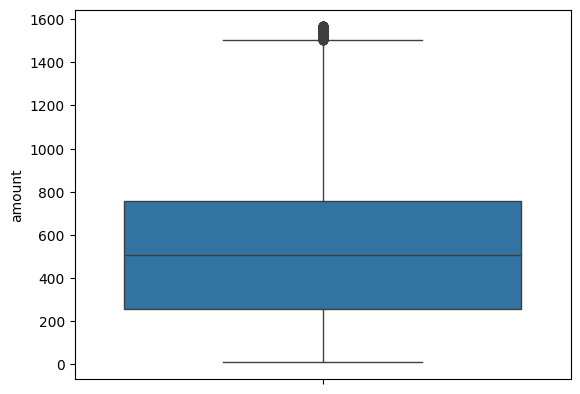

In [57]:
sns.boxplot(data=df1['amount'])

## Feature Engineering

In [58]:
#extracting date-time from timestamp
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1['hour'] = df1['timestamp'].dt.hour
df1['day_of_week'] = df1['timestamp'].dt.dayofweek
df1['is_weekend'] = df1['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [59]:
# Transiction to income ratio
df1['transition_income_ratio'] = df1['amount'] / df1['income']

In [60]:
# Location-Device Consistency (assuming previous device/location columns)
df1['location_device_change'] = df1.groupby('user_id')['location'].shift() != df1['location']
df1['location_device_change'] = df1['location_device_change'].fillna(0).astype(int)

## Exploratory Data Analysis

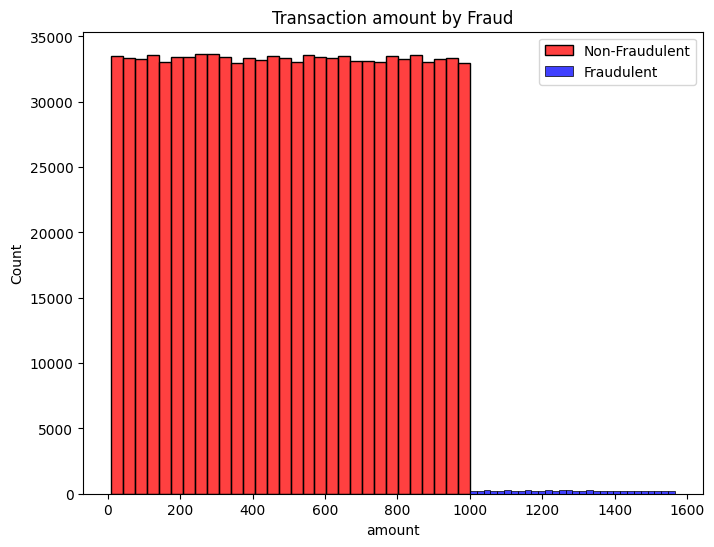

In [61]:
# Distribution of Amount by Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize = (8,6))
sns.histplot(df1[df1['is_fraud'] == 0]['amount'], bins = 30, color= 'red', label = 'Non-Fraudulent')
sns.histplot(df1[df1['is_fraud'] == 1]['amount'], bins = 30, color= 'blue', label = 'Fraudulent')
plt.legend()
plt.title("Transaction amount by Fraud")
plt.show()

Comment: Here we can observe that for fraudulant transactions the amount is more than 1000.

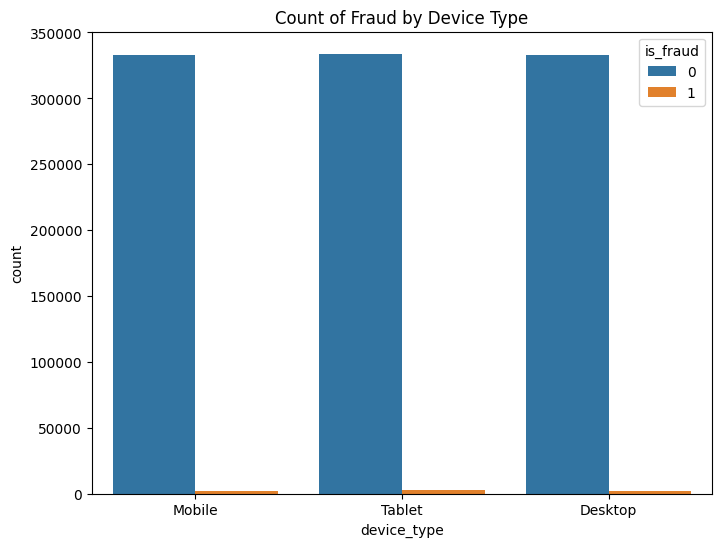

In [62]:
# Count of Fraud by Device Type
plt.figure(figsize= (8,6))
sns.countplot(x='device_type', hue= 'is_fraud', data= df1)
plt.title('Count of Fraud by Device Type')
plt.show()

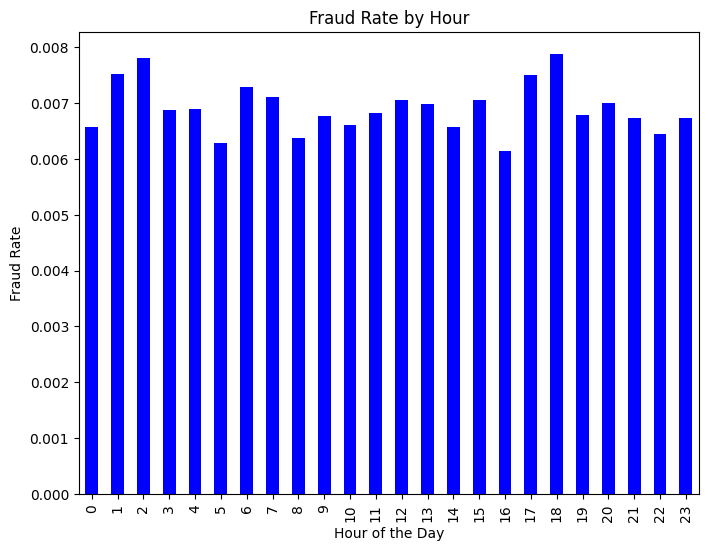

In [63]:
# Fraud Rate by Hour of the Day
hourly_fraud_rate = df1.groupby('hour')['is_fraud'].mean()
plt.figure(figsize=(8,6))
hourly_fraud_rate.plot(kind = 'bar', color = 'blue')
plt.title("Fraud Rate by Hour")
plt.xlabel('Hour of the Day')
plt.ylabel('Fraud Rate')
plt.show()

## Data Modelling

### Feature selection & data splitting

In [64]:
# seleting features and dependent variables
features = ['amount', 'hour', 'day_of_week','is_weekend','transition_income_ratio', 'location_device_change',
           'age', 'income', 'debt', 'credit_score']
X = df1[features]
y = df1['is_fraud']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 42)

#scaler features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [65]:
#Logistic regression model
lr = LogisticRegression(class_weight= 'balanced')
lr.fit(X_train,y_train)

#predictions and evaluation
y_pred = lr.predict(X_test)
print("Logistic Regression Report: \n", classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("ROC AUC Score: \n", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("Accuracy_score:\n",accuracy_score(y_test,y_pred))

Logistic Regression Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    200003
           1       0.80      1.00      0.89      1389

    accuracy                           1.00    201392
   macro avg       0.90      1.00      0.94    201392
weighted avg       1.00      1.00      1.00    201392

Confusion Matrix:
 [[199659    344]
 [     0   1389]]
ROC AUC Score: 
 0.9999997084276997
Accuracy_score:
 0.9982918884563439


### Random Forest Model

In [66]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
# prediction and evaluation
pred=rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test,pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,pred))
print("Best Random Forest ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("Accuracy_score:\n",accuracy_score(y_test,pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    200003
           1       1.00      1.00      1.00      1389

    accuracy                           1.00    201392
   macro avg       1.00      1.00      1.00    201392
weighted avg       1.00      1.00      1.00    201392

Confusion Matrix:
 [[200003      0]
 [     0   1389]]
Best Random Forest ROC AUC Score: 1.0
Accuracy_score:
 1.0


### XGBoost Model

In [67]:
# xtreme gradient boost model
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
# prediction and evaluation
pred_xgb=xgb.predict(X_test)
print("XG Boost Report:\n", classification_report(y_test,pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test,pred_xgb))
print("Best XG Boost ROC AUC Score:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))
print("Accuracy_score of XG Boost:\n",accuracy_score(y_test,pred_xgb))

XG Boost Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    200003
           1       0.98      0.98      0.98      1389

    accuracy                           1.00    201392
   macro avg       0.99      0.99      0.99    201392
weighted avg       1.00      1.00      1.00    201392

Confusion Matrix:
 [[199971     32]
 [    33   1356]]
Best XG Boost ROC AUC Score: 0.9999827756363353
Accuracy_score of XG Boost:
 0.9996772463652975


Comment: All of these model performing well but we saw that there is inconvenience in the data set that's why all models are preforming execessively well.

## 2. Credit Risk Analysis

## Data Preprocessing

In [68]:
data1 = pd.read_csv('credit_score.csv', encoding='unicode_escape')

df2 = data1.copy()

In [69]:
df2.sample(10)

,id,loan_amount,funded_amount,funded_amount_invoice,term,interest_rate,installment,grade,emploment_title,employment_length,...,delinq_2yrs,earliest_credit_line,inquiry_last_6mths,open_accont,public_record,revolving_balance,revoling_utility,total_account,out_previously_reported_no_change,total_paymnt
119128,929437,8000,8000,8000.0,36 months,15.59,279.64,C,Salesperson,< 1 year,...,0.0,39264.0,0.0,5.0,0.0,1502.0,21.5,17.0,0.0,4093.690000
88440,898750,20000,20000,20000.0,36 months,5.32,602.3,A,Police Officer,10+ years,...,0.0,32356.0,0.0,21.0,0.0,49371.0,51.4,38.0,0.0,26761.505650
7878,818188,21000,21000,21000.0,36 months,7.91,657.2,A,Engineering Program Manager,10+ years,...,0.0,36342.0,2.0,6.0,0.0,5833.0,29.2,16.0,0.0,23306.859740
97969,908279,8400,8400,8400.0,36 months,11.39,276.56,B,Licensed Practical Nurse,4 years,...,1.0,37653.0,0.0,7.0,0.0,3366.0,73.2,17.0,0.0,3638.092070
16161,826471,20000,20000,20000.0,36 months,16.99,712.96,D,Director of Student Services,10+ years,...,0.0,32051.0,0.0,22.0,0.0,52730.0,45.2,35.0,0.0,36608.534780
77000,887310,12000,12000,12000.0,60 months,14.99,285.42,C,Owner,3 years,...,0.0,37043.0,0.0,5.0,1.0,8388.0,72.9,18.0,0.0,11088.386360
128525,938833,10000,10000,10000.0,36 months,10.64,325.69,B,Registered Nurse,10+ years,...,0.0,35400.0,0.0,8.0,1.0,12664.0,33.1,20.0,0.0,1948.120000
43690,854000,15000,15000,15000.0,60 months,11.44,329.44,B,Supervisor,10+ years,...,0.0,37469.0,1.0,12.0,0.0,20896.0,45.0,22.0,0.0,22198.748550
45090,855400,12000,12000,12000.0,36 months,8.24,377.37,B,Patent Attorney,3 years,...,0.0,32417.0,0.0,17.0,0.0,9039.0,39.5,44.0,0.0,7732.211554
110213,920523,2000,2000,2000.0,36 months,13.49,67.87,C,Undergraduate Admissions Counselor,3 years,...,0.0,36039.0,0.0,15.0,0.0,26701.0,58.3,19.0,0.0,35993.495130


In [70]:
df2.shape

(134600, 27)

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134600 entries, 0 to 134599
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 134600 non-null  object 
 1   loan_amount                        134600 non-null  object 
 2   funded_amount                      134600 non-null  object 
 3   funded_amount_invoice              134600 non-null  float64
 4   term                               134600 non-null  object 
 5   interest_rate                      134600 non-null  object 
 6   installment                        134600 non-null  object 
 7   grade                              134600 non-null  object 
 8   emploment_title                    125579 non-null  object 
 9   employment_length                  125769 non-null  object 
 10  home_ownership                     134598 non-null  object 
 11  annual_income                      1345

In [72]:
df2.describe()

,funded_amount_invoice,annual_income,debt_to_income,delinq_2yrs,earliest_credit_line,inquiry_last_6mths,open_accont,public_record,revolving_balance,revoling_utility,total_account,out_previously_reported_no_change,total_paymnt
count,134600.000000,1.345980e+05,134570.000000,134598.000000,134598.000000,134596.000000,134596.000000,134596.000000,134596.000000,134510.000000,134596.000000,134596.0,134596.000000
mean,14477.763611,8.090737e+04,18.451231,0.337546,36379.518324,0.572394,11.702948,0.245104,16658.177472,49.558947,24.833190,0.0,15037.577774
std,9148.585621,7.626579e+04,10.923949,0.913274,2820.634157,0.863686,5.656166,0.649003,23740.071002,24.437711,12.121829,0.0,10367.189161
min,950.000000,0.000000e+00,0.000000,0.000000,8388.410000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,0.000000
25%,7200.000000,4.861025e+04,11.870000,0.000000,34912.000000,0.000000,8.000000,0.000000,5772.000000,31.000000,16.000000,0.0,6882.803008
50%,12000.000000,6.800000e+04,17.810000,0.000000,36923.000000,0.000000,11.000000,0.000000,10872.000000,48.900000,23.000000,0.0,12545.918810
75%,20000.000000,9.600000e+04,24.380000,0.000000,38292.000000,1.000000,15.000000,0.000000,19716.250000,68.000000,32.000000,0.0,21219.581825
max,54000.000000,7.000055e+06,999.000000,30.000000,42217.000000,5.000000,66.000000,28.000000,898146.000000,152.500000,135.000000,0.0,59571.664550


In [73]:
df2.isnull().sum()

,0
id,0
loan_amount,0
funded_amount,0
funded_amount_invoice,0
term,0
interest_rate,0
installment,0
grade,0
emploment_title,9021
employment_length,8831


### Handling Missing Values

In [74]:
# Filling missing values with median
df2['debt_to_income'].fillna(df2['debt_to_income'].median(), inplace=True)
df2['revoling_utility'].fillna(df2['revoling_utility'].median(), inplace=True)

# Drop rows of small missing values
df2.dropna(subset=[ 'home_ownership', 'annual_income', 'verification_status', 'issue_date', 'purpose', 'address_state',
                  'delinq_2yrs', 'earliest_credit_line','inquiry_last_6mths', 'open_accont', 'public_record',
       'revolving_balance','total_account', 'out_previously_reported_no_change', 'total_paymnt'], inplace=True)

In [75]:
df2.isnull().sum()

,0
id,0
loan_amount,0
funded_amount,0
funded_amount_invoice,0
term,0
interest_rate,0
installment,0
grade,0
emploment_title,9021
employment_length,8829


### Dropping Uncessary Columns

In [76]:
# Drop the Unnamed Column if it’s just an index or ID
df2 = df2.drop(columns=['id','emploment_title','employment_length','issue_date','address_state','grade','purpose'])

### Outiler detection and treatment

In [77]:
df2.shape

(134596, 20)

<Axes: ylabel='annual_income'>

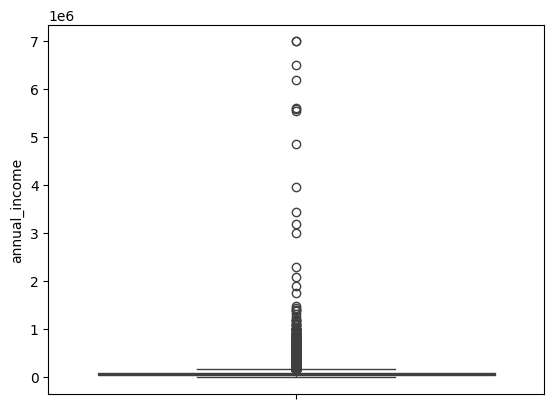

In [78]:
sns.boxplot(df2['annual_income'])

In [79]:
## Removing Outliers for Annual Income using IQR
Q1 = df2['annual_income'].quantile(0.25)
Q3 = df2['annual_income'].quantile(0.75)
IQR = Q3 - Q1
df2 = df2[(df2['annual_income']>= Q1 - 1.5 * IQR) & (df2['annual_income'] <= Q3 + 1.5 * IQR)]

<Axes: ylabel='annual_income'>

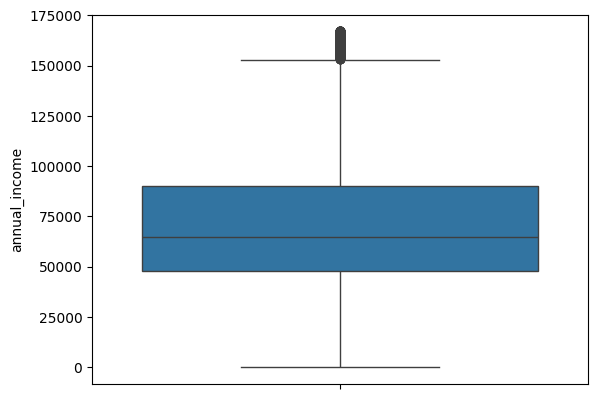

In [80]:
sns.boxplot(df2['annual_income'])

## Feature Engineering

In [81]:
# Debt-to-Income ratio flag (higher ratios indicate higher credit risk)
df2['high_dti_flag'] = np.where(df2['debt_to_income'] > 35, 1, 0)

# Revolving Balance to Total Payment Ratio
df2['revolving_balance_to_payment'] = df2['revolving_balance'] / (df2['total_paymnt'] + 1)  # Adding 1 to avoid division by zero

In [ ]:
df2['high_dti_flag']

,high_dti_flag
0,0
1,0
2,0
3,1
4,0
...,...
134595,0
134596,0
134597,0
134598,0


In [82]:
# Log transformation for highly skewed data
df2['annual_income_log'] = np.log1p(df2['annual_income'])

## Exploratory Data Analysis

In [83]:
# Convert 'term' column to string, then extract numeric part and convert it to integer
df2['term'] = df2['term'].astype(str).str.extract('(\d+)').astype(int)

In [84]:
df2['revolving_utilization'] = df2['revolving_balance'] / df2['revoling_utility']

In [85]:
df2.shape

(127746, 24)

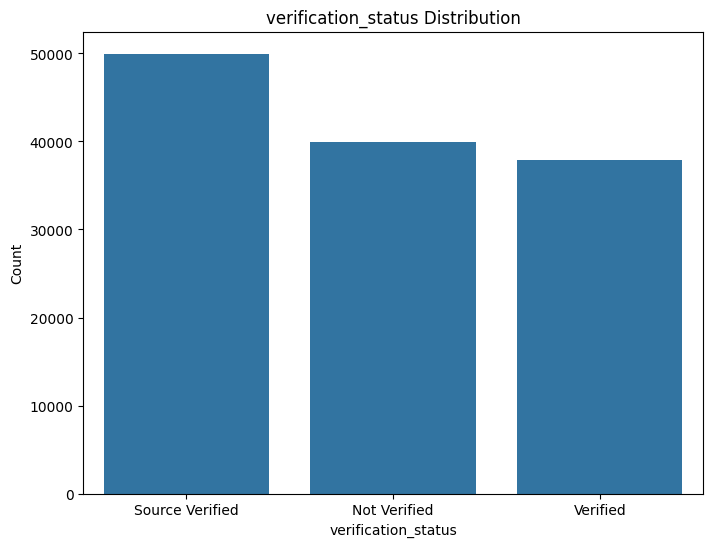

In [86]:
# Distribution of verification_status
plt.figure(figsize=(8, 6))
sns.countplot(x='verification_status', data=df2)
plt.title('verification_status Distribution')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.show()

## Model Selection & Data Splitting

In [87]:
le=LabelEncoder()
df2['verification_status']=le.fit_transform(df2['verification_status'])
df2['home_ownership']=le.fit_transform(df2['home_ownership'])

In [88]:
# Define target and features
target =df2['verification_status']
features=['revolving_balance_to_payment','annual_income_log',
          'term','installment','interest_rate',

'loan_amount','high_dti_flag'
          ,'inquiry_last_6mths',
          'debt_to_income','home_ownership','delinq_2yrs',
          'total_paymnt',
          'revolving_balance']

X1 = df2[features]
y1 = target

# Train-Test Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

### Logistic Regression

In [89]:
# Logistic Regression Model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train1, y_train1)

# Predictions and Evaluation
y_pred1 = lr.predict(X_test1)
print("Classification Report:\n", classification_report(y_test1, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred1))

print("Accuracy_score",accuracy_score(y_test1,y_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50      8043
           1       0.45      0.56      0.50      9956
           2       0.49      0.36      0.41      7551

    accuracy                           0.48     25550
   macro avg       0.49      0.47      0.47     25550
weighted avg       0.48      0.48      0.48     25550

Confusion Matrix:
 [[3983 3215  845]
 [2472 5574 1910]
 [1294 3564 2693]]
Accuracy_score 0.4794520547945205


### Random Forest

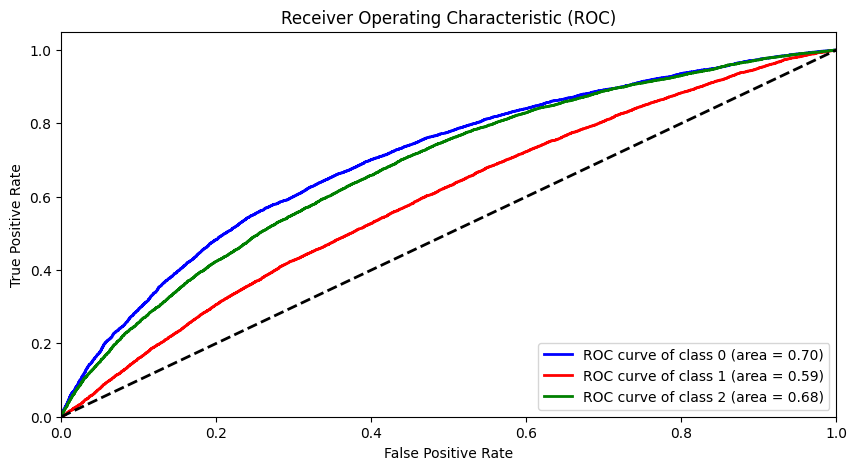

In [97]:

def plot_multiclass_roc(clf, x_test, y_test, n_classes, figsize=(10, 5)):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values  # Ensure y_test is correctly formatted

    # Assuming clf.predict_proba() gives you probabilities for each class
    y_score = clf.predict_proba(x_test)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=figsize)
    colors = ['blue', 'red', 'green']  # Adjust based on your number of classes
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                       ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


plot_multiclass_roc(lr, X_test1, y_test1, n_classes=3)


In [90]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=9,random_state=76,min_samples_split=3)
rf.fit(X_train1,y_train1)
# prediction and evaluation
pred=rf.predict(X_test1)
print("Random Forest Report:\n", classification_report(y_test1,pred))
print("Confusion Matrix:\n", confusion_matrix(y_test1,pred))

print("accuracy_score:\n",accuracy_score(y_test1,pred))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.52      0.56      0.54      8043
           1       0.46      0.58      0.51      9956
           2       0.52      0.31      0.39      7551

    accuracy                           0.49     25550
   macro avg       0.50      0.48      0.48     25550
weighted avg       0.50      0.49      0.48     25550

Confusion Matrix:
 [[4493 2931  619]
 [2697 5743 1516]
 [1396 3821 2334]]
accuracy_score:
 0.4919765166340509


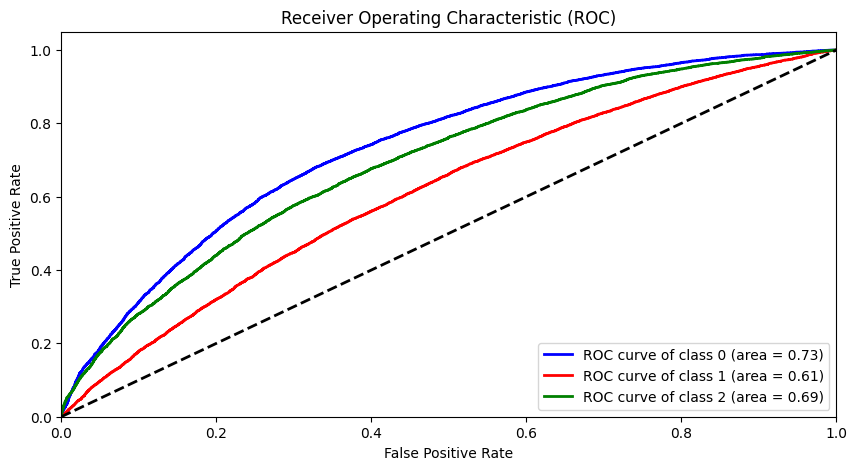

In [98]:
plot_multiclass_roc(rf, X_test1, y_test1, n_classes=3)

In [91]:
# xtreme gradient boost model
xgb=XGBClassifier()
xgb.fit(X_train1,y_train1)
# prediction and evaluation
pred_xgb=xgb.predict(X_test1)
print("XG Boost Report:\n", classification_report(y_test1,pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test1,pred_xgb))

print("accuracy_score of XG Boost:\n",accuracy_score(y_test1,pred_xgb))

XG Boost Report:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53      8043
           1       0.47      0.55      0.51      9956
           2       0.50      0.36      0.42      7551

    accuracy                           0.49     25550
   macro avg       0.50      0.48      0.49     25550
weighted avg       0.49      0.49      0.49     25550

Confusion Matrix:
 [[4328 2866  849]
 [2545 5502 1909]
 [1378 3430 2743]]
accuracy_score of XG Boost:
 0.4920939334637965


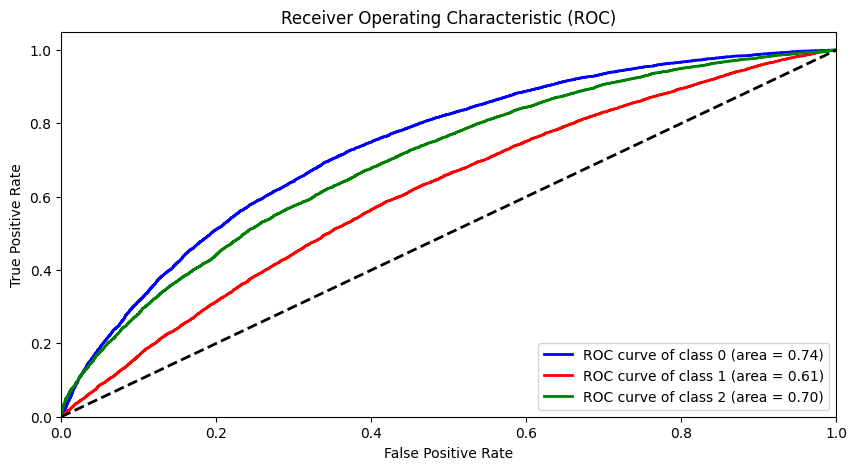

In [99]:
plot_multiclass_roc(xgb, X_test1, y_test1, n_classes=3)

Comment: None of the model is performing well, it's seem like there's some issue with the data.